In [57]:
from typing import TypedDict, List
from langgraph.graph import START, END, StateGraph
import random

In [58]:
class agentState(TypedDict):
    name : str
    guesses : List[int]
    attempt : int
    lower_bound : int 
    upper_bound : int
    target : int 

In [59]:
def greeting_node(state : agentState) -> agentState:
    if "name" in state and not state["name"].startswith("Hi "):
        state["name"] = f"Hi {state['name']}"
    if state.get("attempt") is None:
        state["attempt"] = 0
    if state.get("lower_bound") is None:
        state["lower_bound"] = 1
    if state.get("upper_bound") is None:
        state["upper_bound"] = 10
    if state.get("guesses") is None:
        state["guesses"] = []
    return state

def random_number_node(state : agentState) -> agentState:
    state["attempt"] = state.get("attempt", 0) + 1

    low = state["lower_bound"]
    high = state["upper_bound"]
    guess = random.randint(low, high)
    state["guesses"].append(guess)

    if guess < state["target"]:
        state["lower_bound"] = guess + 1
    elif guess > state["target"]:
        state["upper_bound"] = guess - 1

    return state

def should_continue(state : agentState):
    if state["guesses"] and state["guesses"][-1] == state["target"]:
        return "EXIT"
    if state["attempt"] >= 10:
        return "EXIT"
    return "LOOP"



In [60]:
graph = StateGraph(agentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("random_number_node", random_number_node)
graph.add_edge("greeting_node", "random_number_node")

graph.add_conditional_edges(
    "random_number_node",
    should_continue,
    {
        "LOOP" : "random_number_node",
        "EXIT" : END
    }
)

graph.add_edge(START, "greeting_node")

app = graph.compile()


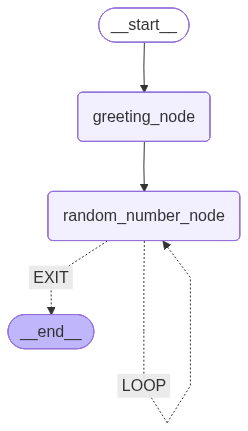

In [61]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [62]:
result = app.invoke({
    "name" : "User", 
    "guesses" : [],
    "attempt" : 40,
    "lower_bound" : 8,
    "upper_bound" : 67,
    "target" : 6,
    
})

result

{'name': 'Hi User',
 'guesses': [38],
 'attempt': 41,
 'lower_bound': 8,
 'upper_bound': 37,
 'target': 6}